# Data Visualisation for Home Prices Prediction

In [1]:
# Import library
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
import data_analysis as da

   MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                   
1          60       RL         65.0     8450   Pave   NaN      Reg   
2          20       RL         80.0     9600   Pave   NaN      Reg   
3          60       RL         68.0    11250   Pave   NaN      IR1   
4          70       RL         60.0     9550   Pave   NaN      IR1   
5          60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
Id                                  ...                                     
1          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
2          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
3          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
4          Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
5          Lvl    AllPub       FR2  ...        

#### Target Feature

<Axes: xlabel='SalePrice', ylabel='Count'>

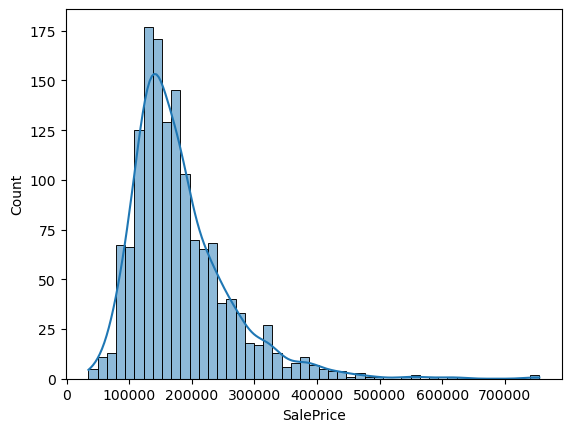

In [3]:
sns.histplot(da.y, kde = True)

Slight skew in SalePrice to the right, might be worth log(1+x) transforming the target

Look at correlation between target and features

In [4]:
correlation = pd.concat([da.train[da.numerical_cols], da.y], axis = 1).corr()

correlation[['SalePrice']].sort_values(by=['SalePrice'], ascending=False)

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


#### Numerical Features

In [5]:
show = False

In [6]:
def plot_num_hist(show):
    if (show == True):
        fig = plt.figure(figsize=(20, 40))
        ax = []
        for i, val in enumerate(da.numerical_cols):
            ax.append(fig.add_subplot(10, 4, i+1))
            ax.append(sns.histplot(da.train[val].dropna(), kde=True))
            fig.tight_layout()
plot_num_hist(show)

Mostly 0 area for some features e.g. Porch and Pools

In [7]:
def plot_num_box(show):
    if (show == True):
        fig = plt.figure(figsize=(20, 40))
        ax = []
        for i, val in enumerate(da.numerical_cols):
            ax.append(fig.add_subplot(10, 4, i+1))
            ax.append(sns.boxplot(da.train[val].dropna()))
            fig.tight_layout()
plot_num_box(show)

Most extreme outliers are: 'LotFrontage','LotArea','BsmtFinSF1', 'TotalBsmtSF', 'GrLivArea'

Less extreme outliers are: 'MasVnrArea', '1stFlrSF', 'Fireplaces', 'GarageCars', 'OpenPorchSF'

Mostly 0s: BsmtFinSF2, LowQualFinSF, 'BsmtHalfBalf','KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'

Look for quasi-constant features (features with >95% of the same values here)

In [8]:
overfit_num = []
for col in da.numerical_cols:
    counts = da.train[col].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(da.train) > 0.95:
        overfit_num.append(col)

overfit_num

['LowQualFinSF',
 'KitchenAbvGr',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'train_test']

Look for multicollinearity of over 80%

In [9]:
def plot_num_corr(show):
    if (show == True):
        plt.figure(figsize=(14, 12))
        sns.heatmap(correlation, mask=correlation<0.8, 
                    linecolor = 'black', linewidths=.5)
plot_num_corr(show)

GarageYrBlt and YearBuilt

1stFlrSF and TotalBsmtSF

GarageArea and GarageCars

TotRmsAbvGrd and GrLivArea

In [10]:
def plot_num_reg(show):
    if (show == True):
        fig = plt.figure(figsize=(20, 40))
        ax = []
        for i, val in enumerate(da.numerical_cols):
            ax.append(fig.add_subplot(10, 4, i+1))
            ax.append(sns.regplot(x = val, y = 'SalePrice', 
                                  data = pd.concat([da.train[da.numerical_cols], da.y],
                                                   axis = 1).dropna()))
            fig.tight_layout()
plot_num_reg(show)

Features with mostly 0s have poor correlations with SalePrice.

YrSold and MoSold have no correlation with the SalePrice and should be removed.


### Categorical Features

In [11]:
def plot_cat_count(show):
    if show == True:
        fig = plt.figure(figsize=(20, 40))
        ax = []
        
        for i, val in enumerate(da.categorical_cols):
            ax.append(fig.add_subplot(11, 4, i+1))
            ax.append(sns.countplot(data = da.train, x = val))
        fig.tight_layout()
plot_cat_count(show)

Highest Cardinality Features: 'Neighborhood', 'Exterior1st', 'Exterior2nd'

In [12]:
overfit_cat = []
for col in da.categorical_cols:
    counts = da.train[col].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(da.train) > 0.95:
        overfit_cat.append(col)
overfit_cat

['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating']

In [13]:
def cat_box(show):
    if show == True:
        fig = plt.figure(figsize = (20, 40))
        for i, val in enumerate(da.categorical_cols):
            sns.catplot(x = val, y = 'SalePrice', data = pd.concat([
                da.train[da.categorical_cols], da.y
            ], axis = 1), kind='box')
            fig.tight_layout()
cat_box(show)

### NA values

              Features
PoolQC        0.995205
MiscFeature   0.963014
Alley         0.937671
Fence         0.807534
MasVnrType    0.597260
FireplaceQu   0.472603
LotFrontage   0.177397
GarageYrBlt   0.055479
GarageCond    0.055479
GarageType    0.055479
GarageFinish  0.055479
GarageQual    0.055479
BsmtExposure  0.026027
BsmtFinType2  0.026027
BsmtCond      0.025342
BsmtQual      0.025342
BsmtFinType1  0.025342
MasVnrArea    0.005479
Electrical    0.000685


<Axes: xlabel='None', ylabel='Features'>

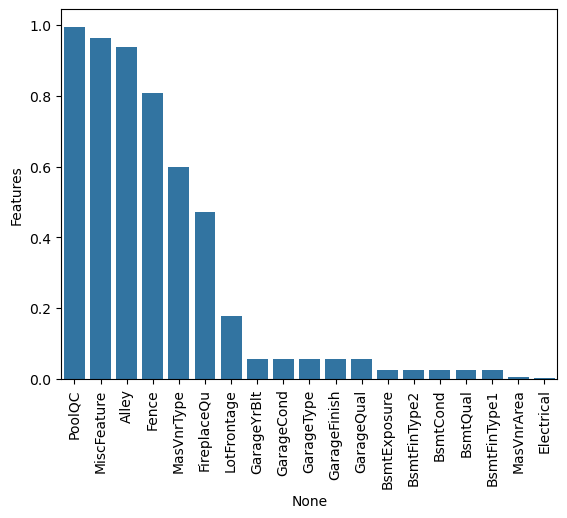

In [14]:
na_df = pd.DataFrame({"Features": da.train.isnull().sum(axis=0)/len(da.train)}
                     ).sort_values(by = 'Features', ascending=False)
na_df = na_df.loc[na_df['Features'] != 0]
print(na_df)
plt.xticks(rotation='vertical')
sns.barplot(x = na_df.index, y = na_df.Features)